In [24]:
import re

from pathlib import Path
import matplotlib.pyplot as plt

In [34]:
result_dir = Path().resolve().parent / 'result'
num_particle_result_dir = result_dir / 'num_particles'
num_layer_result_dir = result_dir / 'num_layer'

result_dict = {
    'seq': {
        'num_particles': {},
        'num_layer': {},
    },
    'omp': {
        'num_particles': {},
        'num_layer': {},
    },
    'mpi': {
        'num_particles': {},
        'num_layer': {},
    },
    'hip': {
        'num_particles': {},
        'num_layer': {},
    },
}

time_regex = re.compile('Time: ([0-9]*[.]?[0-9]+)')

In [35]:
for prefix in result_dict:
    for i in range(1, 7):
        particle_result_file = num_particle_result_dir / f'{prefix}_a30k_w{i}_time.txt'
        running_time = []
        with particle_result_file.open() as f:
            for line in f:
                match = time_regex.match(line)
                if match:
                    running_time.append(float(match.group(1)))
        assert len(running_time) == 10
        average_running_time = sum(running_time)/len(running_time)
        result_dict[prefix]['num_particles'][i*20000] = average_running_time
    
    num_layer = 1
    for i in range(1, 16):
        layer_result_file = num_layer_result_dir / f'{prefix}_a{num_layer}_w1_time.txt'
        running_time = []
        with layer_result_file.open() as f:
            for line in f:
                match = time_regex.match(line)
                if match:
                    running_time.append(float(match.group(1)))
        assert len(running_time) == 10
        average_running_time = sum(running_time)/len(running_time)
        result_dict[prefix]['num_layer'][num_layer] = average_running_time
        num_layer *= 2

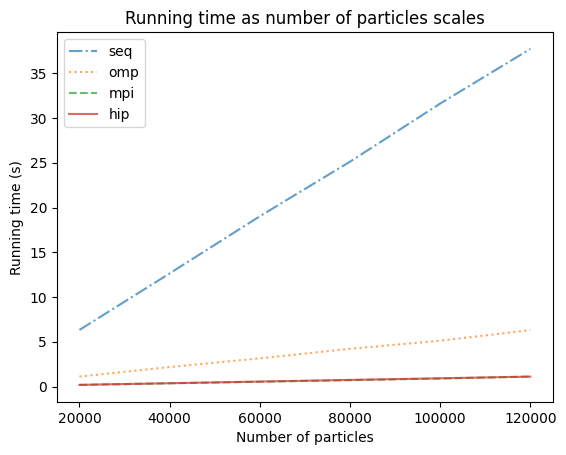

In [51]:
num_particles_list = None
line_styles = ['dashdot', 'dotted', 'dashed', 'solid']
for prefix, line_style in zip(result_dict, line_styles):
    if num_particles_list is None:
        num_particles_list = sorted(list(result_dict[prefix]['num_particles'].keys()))

    running_times = []
    for num_particle in num_particles_list:
        running_times.append(result_dict[prefix]['num_particles'][num_particle])

    plt.plot(num_particles_list, running_times, linestyle=line_style, alpha=0.7, label=prefix)

plt.xlabel("Number of particles")
plt.ylabel("Running time (s)")
plt.legend()
plt.title("Running time as number of particles scales")
plt.savefig('num_particles_scaling.png', bbox_inches='tight', dpi=600)
plt.show()

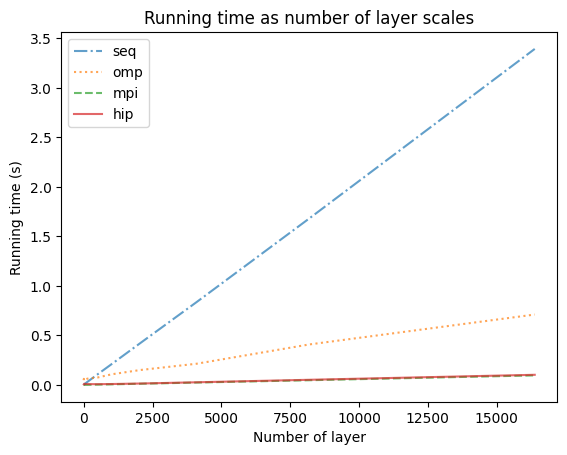

In [52]:
num_layer_list = None
line_styles = ['dashdot', 'dotted', 'dashed', 'solid']
for prefix, line_style in zip(result_dict, line_styles):
    if num_layer_list is None:
        num_layer_list = sorted(list(result_dict[prefix]['num_layer'].keys()))

    running_times = []
    for num_layer in num_layer_list:
        running_times.append(result_dict[prefix]['num_layer'][num_layer])

    plt.plot(num_layer_list, running_times, linestyle=line_style, alpha=0.7, label=prefix)

plt.xlabel("Number of layer")
plt.ylabel("Running time (s)")
plt.legend()
plt.title("Running time as number of layer scales")
plt.savefig('num_layer_scaling.png', bbox_inches='tight', dpi=600)
plt.show()